<a href="https://colab.research.google.com/github/ahmadarbain/skin-disease/blob/main/Skin_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
! mkdir __skin_diseas__
%cd __skin_diseas__

mkdir: cannot create directory ‘__skin_diseas__’: File exists
/content/__skin_diseas__


In [8]:
 ! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmadarbain","key":"1869032fef536e416211087b8e7ce5ec"}'}

In [9]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets download -d shubhamgoel27/dermnet

dermnet.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
! unzip dermnet.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-8.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-80.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-9.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-100.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-101.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-102.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-103.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-104.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-105.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-106.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthom

#Exploratory Data Analysis

In [13]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

15557


Cellulitis Impetigo and other Bacterial Infections


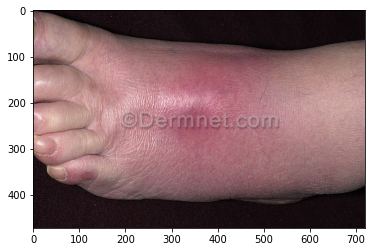

Eczema Photos


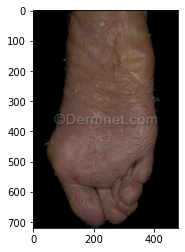

Poison Ivy Photos and other Contact Dermatitis


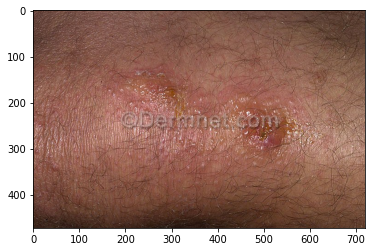

Psoriasis pictures Lichen Planus and related diseases


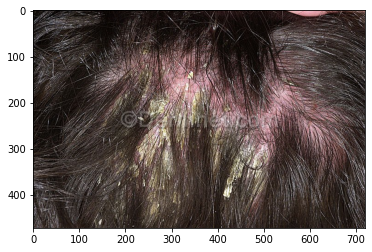

Vasculitis Photos


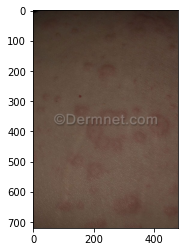

Urticaria Hives


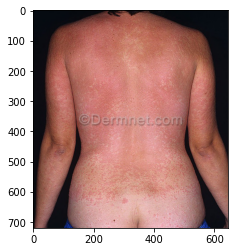

Bullous Disease Photos


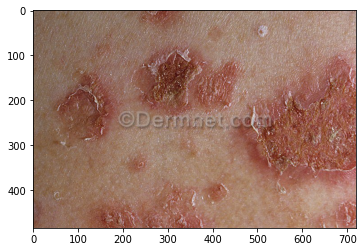

Light Diseases and Disorders of Pigmentation


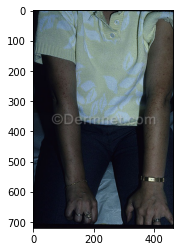

Hair Loss Photos Alopecia and other Hair Diseases


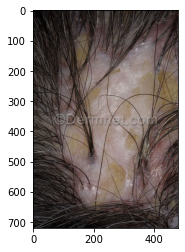

Warts Molluscum and other Viral Infections


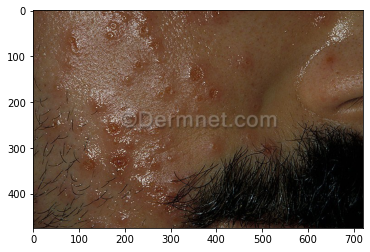

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions


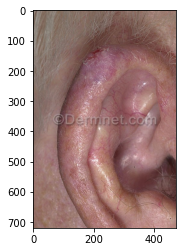

Nail Fungus and other Nail Disease


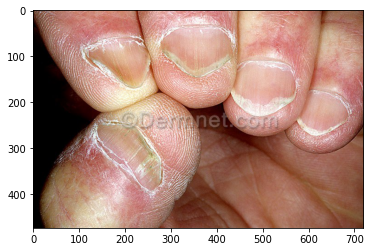

Lupus and other Connective Tissue diseases


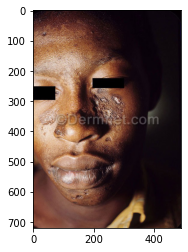

Herpes HPV and other STDs Photos


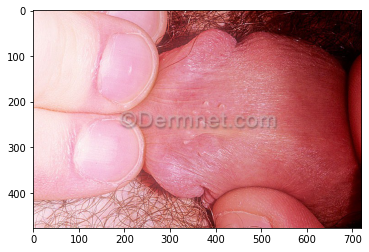

Melanoma Skin Cancer Nevi and Moles


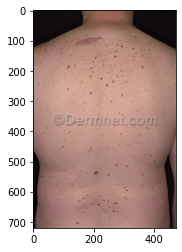

Acne and Rosacea Photos


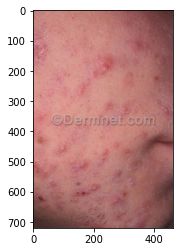

Seborrheic Keratoses and other Benign Tumors


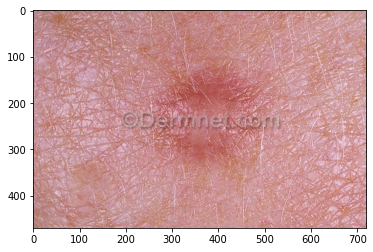

Systemic Disease


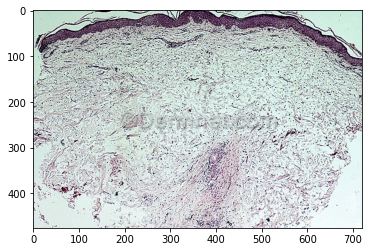

Vascular Tumors


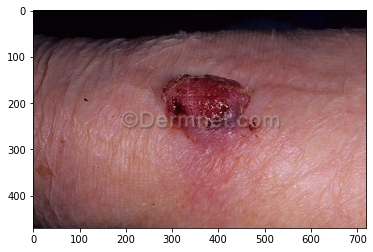

Scabies Lyme Disease and other Infestations and Bites


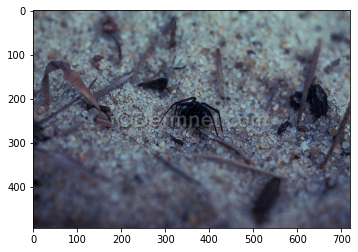

Exanthems and Drug Eruptions


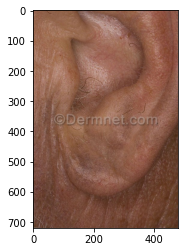

Atopic Dermatitis Photos


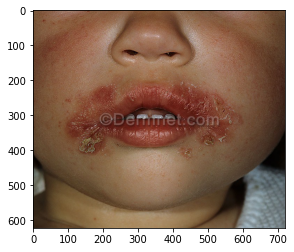

Tinea Ringworm Candidiasis and other Fungal Infections


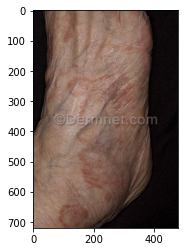

In [19]:
import glob, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pathlib

data_dir = pathlib.Path('./train')
for foldername in os.listdir("./train/"):
  file_path_type = ["./train/"+foldername+"/*.jpg"]
  print(foldername)
  images = glob.glob(random.choice(file_path_type))
  random_image = random.choice(images)
  img = mpimg.imread(random_image)
  imgplot = plt.imshow(img)
  plt.show()

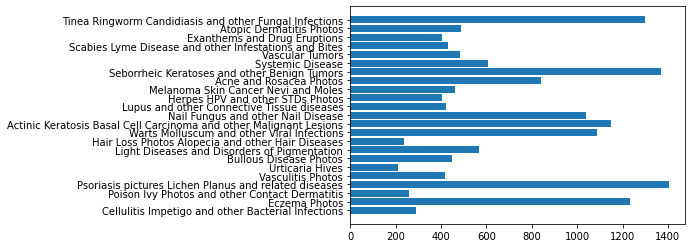

In [9]:
x=[]
y=[]
for foldername in os.listdir("./train/"):
  x.append(foldername)
  count=0
  for filename in os.listdir("./train/"+foldername):
    count+=1
  y.append(count)
plt.barh(x,y)
plt.show()

In [27]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [28]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

15557


In [29]:
batch_size = 64
img_height = 180
img_width = 180

In [30]:
train_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15557 files belonging to 23 classes.
Using 12446 files for training.


In [31]:
validation_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15557 files belonging to 23 classes.
Using 3111 files for validation.


In [33]:
class_names = train_data.class_names
print(class_names)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


In [43]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 180, 180, 3)
(64,)


In [46]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=AUTOTUNE)

In [47]:
normalization_layer = layers.Rescaling(1./255)

In [50]:
import numpy as np

normalized_ds = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0013504329 1.0


In [51]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [56]:
epochs=10
history = model.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/10
195/195 [==============================] - 383s 2s/step - loss: 2.8885 - accuracy: 0.1431 - val_loss: 2.7892 - val_accuracy: 0.1787
Epoch 2/10
195/195 [==============================] - 370s 2s/step - loss: 2.6966 - accuracy: 0.2001 - val_loss: 2.7039 - val_accuracy: 0.2035
Epoch 3/10
195/195 [==============================] - 372s 2s/step - loss: 2.5158 - accuracy: 0.2552 - val_loss: 2.7162 - val_accuracy: 0.2160
Epoch 4/10
195/195 [==============================] - 373s 2s/step - loss: 2.2883 - accuracy: 0.3228 - val_loss: 2.7330 - val_accuracy: 0.2295
Epoch 5/10
195/195 [==============================] - 374s 2s/step - loss: 2.0053 - accuracy: 0.4023 - val_loss: 2.8772 - val_accuracy: 0.2504
Epoch 6/10
195/195 [==============================] - 375s 2s/step - loss: 1.6843 - accuracy: 0.5002 - val_loss: 3.1062 - val_accuracy: 0.2465
Epoch 7/10
195/195 [==============================] - 375s 2s/step - loss: 1.3293 - accuracy: 0.6048 - val_loss: 3.4745 - val_accuracy: 0.2546